In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('labeled_tweets.csv')
data

,id,label,full_text
0,572342978255048705,Offensive,So Drasko just said he was impressed the girls...
1,572342978255048705,Offensive,So Drasko just said he was impressed the girls...
2,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...
3,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...
4,572340476503724032,Offensive,Hopefully someone cooks Drasko in the next ep ...
...,...,...,...
11085,576255143101882368,Non-offensive,RT @Transition: @freebsdgirl just so I’m clear...
11086,576481461424934912,Non-offensive,RT @Leonard_Delaney: @freebsdgirl I know! Holy...
11087,576607445692256256,Non-offensive,"FLOSS Weekly, open source projects, and paying..."
11088,572268344394399744,Non-offensive,RT @Kasparov63: My WSJ article on Boris Nemtso...


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11090 entries, 0 to 11089
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11090 non-null  int64 
 1   label      11090 non-null  object
 2   full_text  11090 non-null  object
dtypes: int64(1), object(2)
memory usage: 173.3+ KB


In [4]:
data['target']=data['label'].apply(lambda x:1 if x=='Offensive' else 0)

In [5]:
data

,id,label,full_text,target
0,572342978255048705,Offensive,So Drasko just said he was impressed the girls...,1
1,572342978255048705,Offensive,So Drasko just said he was impressed the girls...,1
2,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...,1
3,572341498827522049,Offensive,Drasko they didn't cook half a bird you idiot ...,1
4,572340476503724032,Offensive,Hopefully someone cooks Drasko in the next ep ...,1
...,...,...,...,...
11085,576255143101882368,Non-offensive,RT @Transition: @freebsdgirl just so I’m clear...,0
11086,576481461424934912,Non-offensive,RT @Leonard_Delaney: @freebsdgirl I know! Holy...,0
11087,576607445692256256,Non-offensive,"FLOSS Weekly, open source projects, and paying...",0
11088,572268344394399744,Non-offensive,RT @Kasparov63: My WSJ article on Boris Nemtso...,0


In [6]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

In [7]:
v = TfidfVectorizer(max_features=1000000,stop_words=stopwords.words('english'))
X=data['full_text']
X = v.fit_transform(X)
X.shape

(11090, 17572)

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,data['target'], test_size=0.10, random_state=101)

In [35]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)

SVC()

In [10]:
predictions = model.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [12]:
tn, fp, fn, tp = confusion_matrix(predictions,y_test).ravel()


In [13]:
print(tn,fp,fn,tp)

2376 428 47 476


In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2423
           1       0.91      0.53      0.67       904

    accuracy                           0.86      3327
   macro avg       0.88      0.75      0.79      3327
weighted avg       0.86      0.86      0.84      3327



In [15]:
accuracy_score(y_test,predictions)

0.8572287345957319

# Grid search

In [16]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [19]:
# grid.fit(X_train,y_train)

In [21]:
# grid.best_params_

In [23]:
# grid.best_estimator_

In [36]:
model2 = SVC(C=1000, gamma=0.001)
model2.fit(X_train,y_train)

SVC(C=1000, gamma=0.001)

In [37]:
grid_predictions = model2.predict(X_test)

In [38]:
print(confusion_matrix(y_test,grid_predictions))

[[787  29]
 [ 95 198]]


In [39]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       816
           1       0.87      0.68      0.76       293

    accuracy                           0.89      1109
   macro avg       0.88      0.82      0.84      1109
weighted avg       0.89      0.89      0.88      1109



In [33]:
accuracy_score(grid_predictions,y_test)

0.8830778479110309

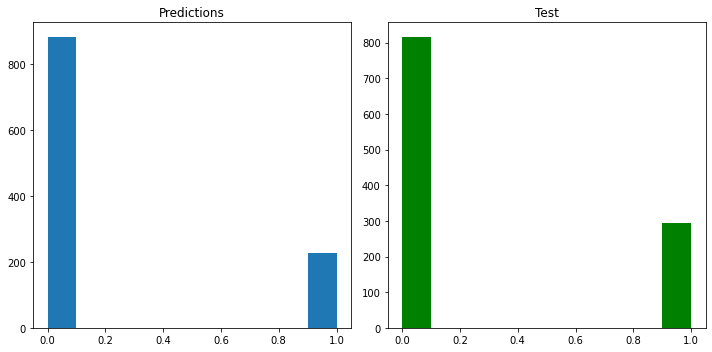

In [61]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(10,5))
axes[0].hist(grid_predictions)
axes[0].set_title('Predictions')
axes[1].hist(y_test,color='green')
axes[1].set_title('Test')
plt.tight_layout()